In an attempt to find sex linked contigs compared to those of annua I'm thinking of looking at the number of heterozygous calls in the male where the females are homozygous. 

The data are only from 3 samples, so false positives will be high. So what i'm thinking is plotting the number of Y-like SNPs vs the number of the opposite (i.e. het in female and hom in male). For the average contig they should be equal, or at least the relationship between them will reflect the sampling (2 males and 1 female).



In [1]:
import vcf

In [17]:
vcf_path = "/Users/danieljeffries/Data/M_huetii_genome/SNP_calling/Filtered_varcalls.vcf"

myvcf = vcf.Reader(open(vcf_path, 'r'))

In [18]:
males = ["./M_huetii_gene_capture_aligned_3aT_male_sorted.bam", 
         "./M_huetii_gene_capture_aligned_5bT_male_sorted.bam"]

female = "./M_huetii_gene_capture_aligned_female_sorted.bam"


In [19]:

heterozygosity_dict = {}

for record in myvcf:
    
    if record.CHROM not in heterozygosity_dict:

        heterozygosity_dict[record.CHROM] = {}
        heterozygosity_dict[record.CHROM]["male_het"] = 0
        heterozygosity_dict[record.CHROM]["female_het"] = 0

    N_het_males = 0
    N_het_females = 0

    for sample in record.samples:
        if sample.sample in males:

            if sample.is_het:
                N_het_males += 1

        elif sample.sample == female:

            if sample.is_het:
                N_het_females += 1

    if N_het_males == 2 and N_het_females == 0:

        heterozygosity_dict[record.CHROM]["male_het"] += 1

    elif N_het_males == 0 and N_het_females == 1:

        heterozygosity_dict[record.CHROM]["female_het"] += 1



Now find the huetii homologs of the annua sex linked contigs? 


In [37]:
contig_table = open("/Users/danieljeffries/Data/M_huetii_genome/SNP_calling/Kept_blast_hits.txt", 'r').readlines()
sex_linked_annua = open("/Users/danieljeffries/Data/M_huetii_genome/SNP_calling/Sex_linked_contigs.txt", 'r').readlines()

sex_linked_annua = [i.strip() for i in sex_linked_annua]
SL_homologs = []

for hit in contig_table:
    annua_ctg = hit.split()[0]
    huetii_ctg = hit.split()[1]
    
    if annua_ctg in sex_linked_annua:
        SL_homologs.append(huetii_ctg)

SL_homologs


['ctg69',
 'ctg81',
 'ctg31',
 'ctg7',
 'ctg1372',
 'ctg69',
 'ctg7',
 'ctg427',
 'ctg90',
 'ctg31',
 'ctg611',
 'ctg31',
 'ctg25',
 'ctg1117',
 'ctg304',
 'ctg455',
 'ctg624',
 'ctg1558',
 'ctg69',
 'ctg455',
 'ctg426',
 'ctg2184',
 'ctg1825',
 'ctg1198',
 'ctg1734',
 'ctg84',
 'ctg220',
 'ctg293',
 'ctg7',
 'ctg427',
 'ctg7',
 'ctg7',
 'ctg528',
 'ctg81',
 'ctg31',
 'ctg654',
 'ctg25',
 'ctg36',
 'ctg7',
 'ctg7',
 'ctg7',
 'ctg1734',
 'ctg796',
 'ctg31',
 'ctg7',
 'ctg31',
 'ctg90',
 'ctg1952',
 'ctg7',
 'ctg278',
 'ctg191',
 'ctg84',
 'ctg84',
 'ctg7',
 'ctg1734',
 'ctg2859',
 'ctg286',
 'ctg160',
 'ctg69',
 'ctg97',
 'ctg548',
 'ctg2859',
 'ctg1231',
 'ctg131',
 'ctg234',
 'ctg1117',
 'ctg84',
 'ctg503',
 'ctg2859',
 'ctg31',
 'ctg147',
 'ctg31',
 'ctg168',
 'ctg845',
 'ctg31',
 'ctg31',
 'ctg31',
 'ctg131',
 'ctg714',
 'ctg1734',
 'ctg315',
 'ctg7',
 'ctg315',
 'ctg25',
 'ctg189',
 'ctg7',
 'ctg427',
 'ctg7',
 'ctg426',
 'ctg131',
 'ctg36',
 'ctg31',
 'ctg36',
 'ctg97',
 'ctg81',


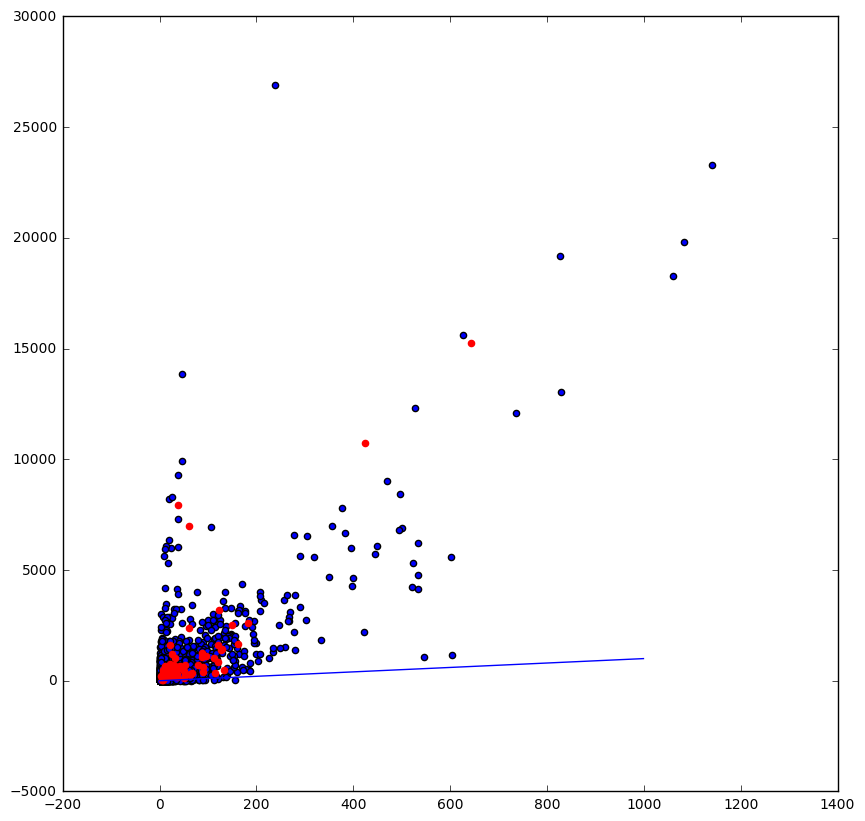

In [38]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (10,10))

for ctg in heterozygosity_dict:
    
    if ctg not in SL_homologs:
        plt.scatter(heterozygosity_dict[ctg]["male_het"],heterozygosity_dict[ctg]["female_het"])

for ctg in heterozygosity_dict:
    
    if ctg in SL_homologs:
        plt.scatter(heterozygosity_dict[ctg]["male_het"],heterozygosity_dict[ctg]["female_het"], color = "red")


    
plt.plot(range(1000))
    
plt.show()
    

So this has not worked at all. . . . there are just so many SNPs in the female! I think there is something weird with the female data - it was a different sequencing run so perhaps there is just something weird with the quick and dirty SNP calls here. . . . 

So I'll call it a day on this and wait until we have some real data. 